# Real-world Data Analysis Project

This lab presents a real-world data analysis project. Through this project, you will gain hands-on understanding of how the different steps of the [Data Analysis Process](https://twitter.com/xtian4zy) can be implemented in real world scenarios. 

## Problem Statement

Mr. Oliver the new Executive manager of ABC Group of Companies is meeting with key management staffs tomorrow and has asked you (as the organization's Data Analyst) to provide information about the organization for him. 

When the secretary communicated the assignment to you, you requested that Mr. Oliver kindly identify what specific information he may be interested in.

### Deliverables:

Mr. Oliver has reversed back to you and wants you to provide the following:

* The details of the oldest employee.
* The highest and lowest salary earned in the organization.
* The group of workers earning more on average based on sex.
* The staff earning the highest salary and from what department?
* The sex distribution of employees.
* The oldest senior management staff.
* The highest earning senior management staff.
* The highest bonus amount recieved by an employee.
* The department whose staff earns the highest culmulative bonus.
* The average salary based on cadre.
* The average salary across department.


### Collect Data

It's time to get on to work. The first thing is to get hold of the data required to solve the given task. This time we don't need to seek for fresh data as there exist an employee dataset domiciled with the Personel department.

Assume, that you have been given a copy of the dataset and now ready to explore.

#### Dataset:

The dataset used for this project is the employees dataset from kaggle.com

### Process Data

We will now begin our data processing to be sure we have quality data that will guarantee relaible conclusions.

### Load data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(employeesdata.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [8]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


#### Observations:

From the above preview, it is evident that there are missing values in the dataset, the 'Start Date' column appears to be in a wrong format.

#### What is the dimension of our dataset?

In [14]:
df.shape

(1000, 8)

#### Let's check what the data types are for our data set.

In [10]:
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

#### Are there missing values?

What a time to find out if our employee records are up-to-date and each staff information stored fully. We'll first check to see if any record is missing from the employees dataset.

In [13]:
df.isna().values.any()

True

We can see that some information regarding the companys employee appear to be missing. Let's see the composition of missing values across attributes.

In [12]:
df.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [16]:
print('The total missing record is ',df.isna().sum().sum())

The total missing record is  322


### Observations

From the above result, we can see that 322 employee records are missing and because of how important these record are to the final outcome of the analysis we'll hhave to communicate it to Mr. Oliver.

Mr. Oliver has responed to your observation and noted that due to time constraint it will be impossible to retrieve the information from staff. As such, he has instructed that you proceed as follows:
* input 'Unknown' for any missing value and treat such as a class of its own along with others. 

### Handling missing values

In [4]:
df.fillna('Unknown', inplace = True)

Let's ccheck to see if we still have any missing value

In [5]:
df.isna().values.any()

False

We look good to go.

### Analyze Data

#### Deliverable 1: The details of the oldest employees.

To get this information, we will need to know how long each employee has worked for. To get this we need to find the length of years an employee has worked till date. 

In [6]:
# This function calculates how long each employee has work for.
from datetime import datetime, date
def length(work):
    work = datetime.strptime(work, "%m/%d/%Y").date()
    today = date.today()
    return today.year - work.year - ((today.month, today.day) < (work.month, work.day))
  
df['Service_Length'] = df['Start Date'].apply(length)
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Service_Length
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing,29
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,Unknown,26
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance,29
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance,17
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,24


Now we have a new column holding how many years each employee has worked for. Let's now get the the details of the oldest employee baseed on the highest service length.

What is the longest number of years someone has worked?

In [7]:
df.Service_Length.max()

42

In [23]:
df3 = df[df['Service_Length']== (df['Service_Length'].max())][['First Name','Gender','Team','Salary','Senior Management',
                                                              'Bonus %','Start Date','Service_Length']]
df3 = df3.sort_values(by='Start Date')
df3

,First Name,Gender,Team,Salary,Senior Management,Bonus %,Start Date,Service_Length
954,Joe,Male,Finance,119667,True,1.148,1/19/1980,42
49,Chris,Unknown,Sales,113590,False,3.055,1/24/1980,42
881,Ruby,Female,Marketing,142868,False,6.318,1/28/1980,42
272,Fred,Male,Product,74129,False,18.225,2/20/1980,42
549,Sara,Female,Finance,75484,False,3.186,2/25/1980,42
82,Steven,Male,Client Services,35095,True,8.379,3/30/1980,42
808,Julie,Female,Engineering,145357,False,3.459,3/8/1980,42
567,Unknown,Female,Unknown,48141,Unknown,12.605,4/1/1980,42
45,Roger,Male,Sales,88010,True,13.886,4/17/1980,42
505,Unknown,Male,Engineering,71520,Unknown,13.248,4/20/1980,42


In [17]:
df3.shape

(19, 8)

We have our deliverable for objective one sorted out. From the result above it shows that there are 19 staffs who got employed in the year 1980 but Joe from Finance department seems to be the oldest as he joined earlier before the others on 1/19/1980.

#### Deliverable 2: The highest and lowest salary earned in the organization.

In [9]:
print('The highest salary earned in the company is ','$',df['Salary'].max())

The highest salary earned in the company is  $ 149908


In [10]:
print('The lowest salary earned in the company is ','$',df['Salary'].min())

The lowest salary earned in the company is  $ 35013


#### Deliverable 3: The group of workers earning more on average based on sex.

In [27]:
round(df.groupby("Gender")['Salary'].mean(),2)

Gender
Female     90023.92
Male       91180.67
Unknown    91043.21
Name: Salary, dtype: float64

From the above, we see that the Male sex earn slightly more on average. This information is not reliable until we resolve the case of the Unknown group of workers as the average salary there is close to the other two group and can influence the final outcome.

In [43]:
earning_sex = round(df.groupby("Gender")['Salary'].mean(),2)

In [44]:
earning_sex.to_frame

<bound method Series.to_frame of Gender
Female     90023.92
Male       91180.67
Unknown    91043.21
Name: Salary, dtype: float64>

In [46]:
earning_sex = earning_sex.reset_index()
earning_sex = earning_sex.set_index('Gender')
earning_sex

,Salary
Gender,
Female,90023.92
Male,91180.67
Unknown,91043.21


Text(0, 0.5, 'Salary Earned')

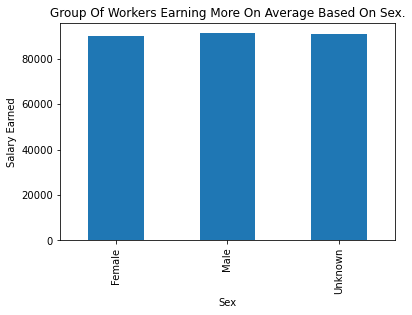

In [48]:
from matplotlib import pyplot as plt
earning_sex['Salary'].plot(kind="bar", title="test")
plt.title("Group Of Workers Earning More On Average Based On Sex.")
plt.xlabel("Sex")
plt.ylabel("Salary Earned")

#### Deliverable 4: The staff earning the highest salary and from what department?

In [83]:
print('The staff earning the highest salary earned in the company is ','\n',df.loc[df['Salary'] == (df['Salary'].max()),['First Name','Team']])

The staff earning the highest salary earned in the company is  
     First Name     Team
644  Katherine  Finance


#### Deliverable 5: The sex distribution of employees.

In [68]:
df['Gender'].value_counts()

Female     431
Male       424
Unknown    145
Name: Gender, dtype: int64

#### Deliverable 6: The oldest senior management staff.

In [87]:
cadre = [True]
df_seniorstaff = df.loc[df['Senior Management'].isin(cadre)]
df_seniorstaff.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Service_Length
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing,28
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,Unknown,26
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance,17
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,24
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product,34


In [124]:
df_seniorstaff.loc[df_seniorstaff['Service_Length']== df_seniorstaff['Service_Length'].max(), 'First Name'].iloc[0:10]


45         Roger
82        Steven
213       Evelyn
601    Christine
743       Steven
954          Joe
964        Bruce
Name: First Name, dtype: object

Find outthe Max service length for Roger

In [123]:
df_seniorstaff.loc[df_seniorstaff['First Name'] == 'Roger', 'Service_Length'].iloc[0:10]

45     42
202    39
503     7
544    12
764    34
Name: Service_Length, dtype: int64

In [122]:
df_seniorstaff.loc[df_seniorstaff['Service_Length'] == 42, 'First Name'].iloc[0:10]

45         Roger
82        Steven
213       Evelyn
601    Christine
743       Steven
954          Joe
964        Bruce
Name: First Name, dtype: object

#### Deliverable 7: The highest earning senior management staff.

In [121]:
df_seniorstaff.loc[df_seniorstaff['Salary']== df_seniorstaff['Salary'].max(), ['First Name','Team']].iloc[0:5]


,First Name,Team
160,Kathy,Finance


In [118]:
df_seniorstaff.loc[df_seniorstaff['First Name'] == 'Kathy', ['First Name','Salary','Team']].iloc[0:5]

,First Name,Salary,Team
47,Kathy,66820,Client Services
160,Kathy,149563,Finance
226,Kathy,50905,Finance
395,Kathy,93753,Sales
443,Kathy,86318,Sales


In [120]:
df_seniorstaff.loc[df_seniorstaff['Salary']== df_seniorstaff['Salary'].max(), ['First Name','Team','Salary','Start Date']].iloc[0:5]


,First Name,Team,Salary,Start Date
160,Kathy,Finance,149563,3/18/2000


#### Deliverable 8: The highest bonus amount received by an employee.

In [127]:
print('The highest bonus amount received by an employee is', round(df['Bonus %'].max(),2),'%')

The highest bonus amount received by an employee is 19.94 %


#### Deliverable 9: The department whose staff earns the highest culmulative bonus.

In [7]:
round(df.groupby("Team")['Bonus %'].sum(),2)

Team
Business Development    1067.81
Client Services         1112.48
Distribution             865.41
Engineering              962.60
Finance                 1039.06
Human Resources          909.44
Legal                    908.41
Marketing               1014.64
Product                  930.19
Sales                    950.99
Unknown                  446.53
Name: Bonus %, dtype: float64

In [8]:
round(df.groupby("Team")['Bonus %'].sum(),2).max()

1112.48

In [155]:
round(df.groupby("Team")['Salary'].sum(),2).max()

9406387

The department whose staff earns the highest culmulative bonus 'Finance'.

#### Deliverable 10: The average salary based on cadre.

In [146]:
round(df.groupby("Senior Management")['Salary'].mean(),2)

Senior Management
False      89638.26
True       90935.16
Unknown    95861.70
Name: Salary, dtype: float64

#### Deliverable 11: The average salary across department.

In [147]:
round(df.groupby("Team")['Salary'].mean(),2)

Team
Business Development    91866.32
Client Services         88224.42
Distribution            88500.47
Engineering             94269.20
Finance                 92219.48
Human Resources         90944.53
Legal                   89303.61
Marketing               90435.59
Product                 88665.51
Sales                   92173.44
Unknown                 90763.14
Name: Salary, dtype: float64

### Communicate/Share Insights

Now, that we are done with our analysis and have derived various insights (as required) it is now time to create a report for Mr. Oliver.

In creating a report, we can do so using different tools. 

Thanks for going through this work. For comment and contribution (including collaboration opportunities) reach me via [Twitter](https://twitter.com/xtian4zy) or on [Linkedin](https://www.linkedin.com/in/idemudiachristianuwa/).

In [ ]:
df_y = df[(df['Course']== 'Computer Science') & (df['Remark'] == 'average')].count()
print (df_y[0], 'computer students got avearge remark')